In [14]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms
import pandas as pd
import os
import shutil

In [ ]:
trans = transforms.Compose([transforms.Resize((512,512)),transforms.ToTensor(),transforms.Normalize()])

In [3]:
data = pd.read_csv('data\좌표포함_수정.csv',encoding='cp949')

In [31]:
A_cl = []
B_cl = []
C_cl = []
D_cl = []
E_cl = []

for i in range(len(data.이름)):
    if data.등급[i] == 'A':
        A_cl.append(i)
    elif data.등급[i] == 'B':
        B_cl.append(i)
    elif data.등급[i] == 'C':
        C_cl.append(i)
    elif data.등급[i] == 'D':
        D_cl.append(i)
    elif data.등급[i] == 'E':
        E_cl.append(i)
    else:
        print(i)


631
632
858


In [18]:
opath = 'image'
image_a = 'A_cl'
image_b = 'B_cl'
image_c = 'C_cl'
image_d = 'D_cl'
image_e = 'E_cl'
file_list = os.listdir(opath)


In [42]:
move_file_a = []
cnt = 0
for file in file_list:
    for i in A_cl:
        if file == (str(i)+'.jpg'):
            move_file_a.append(file)
    cnt += 1
    
move_file_b = []
cnt = 0
for file in file_list:
    for i in B_cl:
        if file == (str(i)+'.jpg'):
            move_file_b.append(file)
    cnt += 1

move_file_c = []
cnt = 0
for file in file_list:
    for i in C_cl:
        if file == (str(i)+'.jpg'):
            move_file_c.append(file)
    cnt += 1
    
move_file_d = []
cnt = 0
for file in file_list:
    for i in D_cl:
        if file == (str(i)+'.jpg'):
            move_file_d.append(file)
    cnt += 1
    
move_file_e = []
cnt = 0
for file in file_list:
    for i in E_cl:
        if file == (str(i)+'.jpg'):
            move_file_e.append(file)
    cnt += 1


In [46]:
for movfi in move_file_a:
    shutil.move(opath+'\\'+movfi,image_a+'\\'+movfi)
for movfi in move_file_b:
    shutil.move(opath+'\\'+movfi,image_b+'\\'+movfi)
    
for movfi in move_file_c:
    shutil.move(opath+'\\'+movfi,image_c+'\\'+movfi)
    
for movfi in move_file_d:
    shutil.move(opath+'\\'+movfi,image_d+'\\'+movfi)

for movfi in move_file_e:
    shutil.move(opath+'\\'+movfi,image_e+'\\'+movfi)
    

In [52]:
len(move_file_a)+len(move_file_b)+len(move_file_c)+len(move_file_d)+len(move_file_e)

1122

Custom Dataset building

In [110]:
trans = transforms.Compose([transforms.Resize((512,512)),transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train_set = torchvision.datasets.ImageFolder(root ='HRI_image', transform = trans )
train_loader = DataLoader(dataset = train_set, batch_size = 8, shuffle = True, num_workers=8)


In [ ]:
train_loader = DataLoader(dataset = train_set, batch_size = 8, shuffle = True, num_workers=8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2 ***********************
Shape of this image	: torch.Size([3, 512, 512])


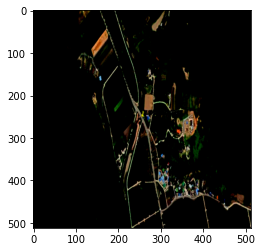

In [131]:
image, label = train_set[910]
print(label,"***********************")
print('Shape of this image\t:', image.shape)
plt.imshow(np.transpose(image, (1, 2, 0)))

plt.show()

In [ ]:
dataiter = iter(train_loader)